In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

import warnings
warnings.filterwarnings("ignore")

In [ ]:
mnist = tf.keras.datasets.mnist # 128 x 128 images of hand-written digits 0-9

In [ ]:
(xtrain, ytrain), (xtest, ytest) = mnist.load_data()

In [ ]:
xtrain

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

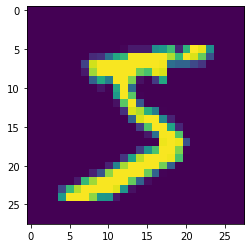

In [ ]:
plt.imshow(xtrain[0]) 
plt.show()

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

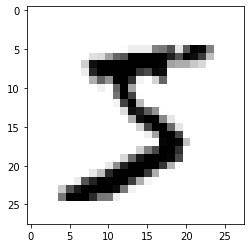

In [ ]:
plt.imshow(xtrain[0],cmap = plt.cm.binary)
print(xtrain[0])

In [ ]:
xtrain = tf.keras.utils.normalize(xtrain, axis=1)
xtest = tf.keras.utils.normalize(xtest, axis=1)

In [ ]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Flatten())
ann.add(tf.keras.layers.Dense(units=128, activation="relu")) #tf.nn.relu
ann.add(tf.keras.layers.Dense(units=128, activation="relu"))
ann.add(tf.keras.layers.Dense(units=10, activation="softmax")) #tf.nn.softmax

ann.compile(optimizer='adam', loss="sparse_categorical_crossentropy",
            metrics=["accuracy"])
ann.fit(xtrain, ytrain, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2613 - accuracy: 0.9227
Epoch 2/3
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1075 - accuracy: 0.9665
Epoch 3/3
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0727 - accuracy: 0.9775


In [ ]:
valloss, valacc = ann.evaluate(xtest, ytest)

313/313 [==============================] - 0s 1ms/step - loss: 0.0887 - accuracy: 0.9741


In [ ]:
ann.save("digitrec.model")

INFO:tensorflow:Assets written to: digitrec.model/assets


In [ ]:
mymodel = tf.keras.models.load_model('digitrec.model')

In [ ]:
pred = mymodel.predict([xtest])

In [ ]:
pred

array([[4.0937667e-10, 2.5829825e-08, 9.1997430e-07, ..., 9.9999332e-01,
        5.6115906e-10, 6.2468740e-07],
       [9.5112917e-08, 6.9551676e-04, 9.9924159e-01, ..., 1.3326961e-06,
        3.6119804e-08, 2.2138258e-11],
       [1.6037596e-06, 9.9481285e-01, 6.7141598e-05, ..., 4.0364894e-03,
        4.0863085e-04, 9.8296732e-06],
       ...,
       [1.7490647e-08, 2.0851047e-07, 4.1033113e-07, ..., 3.7919293e-05,
        5.1364083e-07, 6.6543202e-05],
       [1.2634849e-06, 1.2181104e-07, 1.2204714e-08, ..., 8.1160783e-07,
        1.6102668e-04, 9.1995672e-10],
       [1.1723209e-06, 7.9599033e-07, 1.5741142e-06, ..., 7.0432948e-10,
        1.6761761e-06, 6.5956414e-08]], dtype=float32)

In [ ]:
print(np.argmax(pred[0]))

7


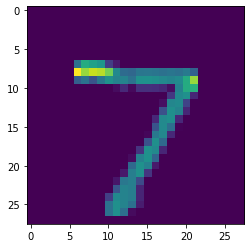

In [ ]:
plt.imshow(xtest[0])
plt.show()